In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import nltk
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
with open('rec_df.pickle', 'rb') as f:
    df = pickle.load(f)

In [3]:
with open('exp_imp_dict.pickle', 'rb') as exp_imp_dict_pickle:
    exp_imp_dict = pickle.load(exp_imp_dict_pickle)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100088 entries, 0 to 100087
Columns: 4419 entries, name to complexity
dtypes: float64(9), int64(4409), object(1)
memory usage: 3.3+ GB


In [33]:
search = 'Pandemic'
df[df['name'].str.contains(search)]

,name,url,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,complexity,...,Webcomics: Dork Tower,Webcomics: Penny Arcade,Word Games: First Letter Given,Word Games: Guess the Word,Word Games: Sign Language,Word Games: Spelling / Letters,avg_user_rating,has_expansion,avg_sent_score,user_type
1690,Pandemic Legacy: Season 1,https://boardgamegeek.com/boardgame/161936,2015.0,2,4,60,60,60,13,2.8408,...,0,0,0,0,0,0,8.61254,0,0.332701,4
6672,Pandemic: Iberia,https://boardgamegeek.com/boardgame/198928,2016.0,2,5,45,45,45,8,2.5775,...,0,0,0,0,0,0,7.92365,0,0.463181,5
14379,Pandemic: Rapid Response,https://boardgamegeek.com/boardgame/280789,2019.0,2,4,20,20,20,8,2.2414,...,0,0,0,0,0,0,6.72603,0,0.318649,4
18117,Pandemic: Rising Tide,https://boardgamegeek.com/boardgame/234671,2017.0,2,5,45,45,45,8,2.4314,...,0,0,0,0,0,0,7.62134,0,0.370024,8
19298,Pandemic: The Cure,https://boardgamegeek.com/boardgame/150658,2014.0,2,5,30,30,30,8,2.0563,...,0,0,0,0,0,0,7.30031,1,0.373111,4
22045,American Pandemic: The Party Card Game,https://boardgamegeek.com/boardgame/329712,2021.0,2,10,120,30,120,13,0.0000,...,0,0,0,0,0,0,5.50000,0,-0.854100,3
24888,Pandemic: Hot Zone – Europe,https://boardgamegeek.com/boardgame/329670,2021.0,2,4,30,30,30,8,0.0000,...,0,0,0,0,0,0,7.36667,0,0.000000,0
27945,People Vs Pandemic,https://boardgamegeek.com/boardgame/324628,2020.0,4,6,150,90,150,7,0.0000,...,0,0,0,0,0,0,0.00000,0,0.000000,0
28883,Pandemic Legacy: Season 0,https://boardgamegeek.com/boardgame/314040,2020.0,2,4,60,45,60,14,3.1579,...,0,0,0,0,0,0,8.79186,0,0.298720,4
30567,Pandemic: Reign of Cthulhu,https://boardgamegeek.com/boardgame/192153,2016.0,2,4,40,40,40,14,2.1862,...,0,0,0,0,0,0,7.40417,0,0.303145,4


In [3]:
df.columns

Index(['name', 'avg_sentiment_score', 'url', 'yr_pub', 'min_players',
       'max_players', 'avg_play_time', 'min_play_time', 'max_play_time',
       'min_age',
       ...
       'Video Game Theme: SEGA', 'Video Game Theme: Sonic the Hedgehog',
       'Video Game Theme: Super Mario Bros.', 'Video Game Theme: Tetris',
       'Webcomics: Dork Tower', 'Webcomics: Penny Arcade',
       'Word Games: First Letter Given', 'Word Games: Guess the Word',
       'Word Games: Sign Language', 'Word Games: Spelling / Letters'],
      dtype='object', length=4420)

In [5]:
df['avg_user_rating'].head()

KeyError: 'avg_user_rating'

In [55]:
df.columns

Index(['name', 'avg_sentiment_score', 'url', 'yr_pub', 'min_players',
       'max_players', 'avg_play_time', 'min_play_time', 'max_play_time',
       'min_age',
       ...
       'Video Game Theme: SEGA', 'Video Game Theme: Sonic the Hedgehog',
       'Video Game Theme: Super Mario Bros.', 'Video Game Theme: Tetris',
       'Webcomics: Dork Tower', 'Webcomics: Penny Arcade',
       'Word Games: First Letter Given', 'Word Games: Guess the Word',
       'Word Games: Sign Language', 'Word Games: Spelling / Letters'],
      dtype='object', length=4420)

In [ ]:
#var take in filters
#get board game idx
#reshape input
#run cos_sim on df and bg
#sort and find closest games

In [68]:
#'yr_pub',
rec_columns = ['avg_play_time','min_players','min_age','has_expansion','complexity','avg_sentiment_score']
#rec_columns = ['has_expansion','complexity']

In [65]:
df[['has_expansion','complexity']].head()

,has_expansion,complexity
0,0,0.00
1,0,0.00
2,0,2.75
3,0,0.00
4,0,0.00


In [21]:
game_name = 'Marvel Champions: The Card Game'

In [11]:
game_name.lower()

'pandemic'

In [22]:
test = df[df['name']==game_name.title()].index.values

In [14]:
df.iloc[test]

,name,avg_sentiment_score,Abstract Strategy,Action / Dexterity,Adventure,Age of Reason,American Civil War,American Indian Wars,American Revolutionary War,American West,...,Word Games: Sign Language,Word Games: Spelling / Letters,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,complexity
57521,Pandemic,1.0,0,0,0,0,0,0,0,0,...,0,0,0.351287,0.000258,-0.044188,-0.003661,0.005317,-0.003661,0.081888,1.425255


In [10]:
df.index.values

array([     0,      1,      2, ..., 100085, 100086, 100087])

In [69]:
test = df.loc[100][rec_columns].values.reshape(1,-1)
print(test)

[[30 2 0 0 1.0 0.9981]]


In [24]:
#get scores
drop_cols = ['name','url']

In [33]:
sorted(df['max_players'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 50,
 51,
 52,
 54,
 55,
 56,
 60,
 61,
 64,
 68,
 69,
 72,
 75,
 76,
 80,
 81,
 88,
 90,
 92,
 96,
 98,
 99,
 100,
 101,
 102,
 103,
 112,
 120,
 125,
 127,
 150,
 160,
 163,
 190,
 200,
 250,
 362,
 399,
 400,
 420,
 500,
 600,
 900,
 999,
 1000,
 2000,
 10000,
 11299]

In [65]:
df[df['max_players']<=150]

,name,url,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,complexity,...,Webcomics: Dork Tower,Webcomics: Penny Arcade,Word Games: First Letter Given,Word Games: Guess the Word,Word Games: Sign Language,Word Games: Spelling / Letters,avg_user_rating,has_expansion,avg_sent_score,user_type
0,Troia,https://boardgamegeek.com/boardgame/102580,2005.0,2,2,60,60,60,8,0.00,...,0,0,0,0,0,0,5.50000,0,0.000000,11
1,Mauseschlau & Bärenstark: Wissen & Lachen – Un...,https://boardgamegeek.com/boardgame/102595,2009.0,2,4,25,25,25,6,0.00,...,0,0,0,0,0,0,5.42857,0,-0.025600,9
2,Quintessential: The Fifth Element,https://boardgamegeek.com/boardgame/102597,2011.0,2,5,45,45,45,13,2.75,...,0,0,0,0,0,0,7.54167,0,0.482075,5
3,Wort für Wort,https://boardgamegeek.com/boardgame/102598,1998.0,1,5,25,25,25,6,0.00,...,0,0,0,0,0,0,5.08333,0,0.493900,11
4,Hannah Montana Secret Star,https://boardgamegeek.com/boardgame/102599,2009.0,2,4,15,15,15,6,0.00,...,0,0,0,0,0,0,4.00000,0,0.000000,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100083,All My Ducks,https://boardgamegeek.com/boardgame/15346,1997.0,2,4,5,5,5,6,0.00,...,0,0,0,0,0,0,5.00000,0,0.000000,11
100084,Frosty The Snowman,https://boardgamegeek.com/boardgame/15347,1979.0,2,4,20,20,20,4,0.00,...,0,0,0,0,0,0,4.62500,0,0.000000,1
100085,Furby Adventure Game,https://boardgamegeek.com/boardgame/15348,1999.0,2,6,15,15,15,4,3.00,...,0,0,0,0,0,0,3.75000,0,0.388300,9
100086,Caboose Dice,https://boardgamegeek.com/boardgame/15349,1974.0,2,2,30,30,30,12,0.00,...,0,0,0,0,0,0,2.50000,0,-0.300700,9


In [43]:
maxp = df['max_players'].value_counts()

(0.0, 3100.0)

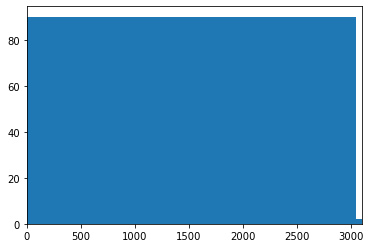

In [55]:
plt.hist(maxp)
plt.xlim(0,3100)

In [35]:
sorted(df['min_players'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 20,
 22,
 24,
 25,
 40,
 50]

In [37]:
df['min_players'].value_counts()

2     72660
1     14046
3      8205
4      2469
0      1837
6       243
5       224
8       219
7        64
10       44
12       22
9        21
15        7
20        5
11        4
13        4
16        4
14        3
40        2
18        1
22        1
24        1
25        1
50        1
Name: min_players, dtype: int64

In [38]:
sorted(df['avg_play_time'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 23,
 24,
 25,
 27,
 28,
 30,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 44,
 45,
 46,
 47,
 48,
 50,
 55,
 60,
 65,
 66,
 68,
 70,
 72,
 75,
 79,
 80,
 85,
 90,
 95,
 96,
 97,
 99,
 100,
 105,
 108,
 110,
 111,
 115,
 118,
 120,
 125,
 130,
 135,
 140,
 150,
 160,
 165,
 175,
 180,
 183,
 190,
 200,
 202,
 210,
 220,
 222,
 225,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 320,
 330,
 340,
 350,
 360,
 380,
 400,
 420,
 445,
 450,
 460,
 480,
 500,
 525,
 540,
 550,
 600,
 640,
 660,
 700,
 720,
 750,
 780,
 800,
 810,
 840,
 900,
 960,
 999,
 1000,
 1080,
 1180,
 1200,
 1260,
 1400,
 1440,
 1500,
 1620,
 1710,
 1740,
 1800,
 1920,
 1950,
 2000,
 2004,
 2005,
 2100,
 2160,
 2200,
 2400,
 2480,
 2880,
 3000,
 3600,
 3900,
 4000,
 4200,
 4500,
 4560,
 4800,
 5000,
 5400,
 6000,
 7920,
 8000,
 8400,
 8640,
 9000,
 9600,
 9999,
 10000,
 10080,
 12000,
 14400,
 17280,
 21600,
 22500,
 

In [39]:
df['avg_play_time'].value_counts()

0        22225
30       15846
60       11182
20        9195
45        6992
         ...  
38           1
165          1
10080        1
72000        1
72           1
Name: avg_play_time, Length: 177, dtype: int64

In [20]:
len(df[df['avg_play_time']<3600])

100021

In [40]:
sorted(df['min_age'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 25,
 30,
 36,
 40,
 45,
 50,
 60,
 90,
 112,
 2017]

In [41]:
df['min_age'].value_counts()

0       22062
8       17480
12      15234
10      12582
6        6470
14       4485
7        4351
5        3968
4        3133
13       3011
3        1829
9        1534
18       1207
16        931
15        708
11        385
17        314
2         199
21        132
20         22
1          16
30         10
19          6
36          4
60          3
25          2
45          2
50          2
24          1
2017        1
22          1
40          1
112         1
90          1
Name: min_age, dtype: int64

In [19]:
df[df['avg_play_time']>=9999999]

,name,avg_sentiment_score,url,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,...,Video Game Theme: SEGA,Video Game Theme: Sonic the Hedgehog,Video Game Theme: Super Mario Bros.,Video Game Theme: Tetris,Webcomics: Dork Tower,Webcomics: Penny Arcade,Word Games: First Letter Given,Word Games: Guess the Word,Word Games: Sign Language,Word Games: Spelling / Letters
15678,Office Space: The Game,0.0,https://boardgamegeek.com/boardgame/311320,2020.0,2,10,30000000,30,30000000,16,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df[~df['name'].isin(exp_imp_dict['Pandemic'])].head()

,name,url,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,complexity,...,Webcomics: Dork Tower,Webcomics: Penny Arcade,Word Games: First Letter Given,Word Games: Guess the Word,Word Games: Sign Language,Word Games: Spelling / Letters,avg_user_rating,has_expansion,avg_sent_score,user_type
0,Troia,https://boardgamegeek.com/boardgame/102580,2005.0,2,2,60,60,60,8,0.00,...,0,0,0,0,0,0,5.50000,0,0.000000,0
1,Mauseschlau & Bärenstark: Wissen & Lachen – Un...,https://boardgamegeek.com/boardgame/102595,2009.0,2,4,25,25,25,6,0.00,...,0,0,0,0,0,0,5.42857,0,-0.025600,9
2,Quintessential: The Fifth Element,https://boardgamegeek.com/boardgame/102597,2011.0,2,5,45,45,45,13,2.75,...,0,0,0,0,0,0,7.54167,0,0.482075,5
3,Wort für Wort,https://boardgamegeek.com/boardgame/102598,1998.0,1,5,25,25,25,6,0.00,...,0,0,0,0,0,0,5.08333,0,0.493900,0
4,Hannah Montana Secret Star,https://boardgamegeek.com/boardgame/102599,2009.0,2,4,15,15,15,6,0.00,...,0,0,0,0,0,0,4.00000,0,0.000000,0


In [ ]:
#Values for sliders

In [7]:
#Start with defaults? Note avg. play time is max. play time?
players = 2
avg_play_time = 30000000
min_age = 5000 
#remove expansions for the filter?
#has_expansion >= 0

#pick a rating(?)
avg_user_rating = 0
bgg_adj_rating = 0 

In [34]:
players = 2
avg_play_time = 360
min_age = 0

In [5]:
Y_new = df

In [30]:
#avg. players, less choices?
Y_new = df[(df['min_players']<=players)&(df['max_players']>=players)&(df['avg_play_time']<=avg_play_time)&\
          (df['min_age']<=min_age)]

In [22]:
Y_filt = Y_new[~Y_new['name'].isin(exp_imp_dict[game_name])]

In [27]:
Y_new.iloc[test]

,name,avg_sentiment_score,url,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,...,Video Game Theme: SEGA,Video Game Theme: Sonic the Hedgehog,Video Game Theme: Super Mario Bros.,Video Game Theme: Tetris,Webcomics: Dork Tower,Webcomics: Penny Arcade,Word Games: First Letter Given,Word Games: Guess the Word,Word Games: Sign Language,Word Games: Spelling / Letters
57521,Pandemic,1.0,https://boardgamegeek.com/boardgame/30549,2008.0,2,4,45,45,45,8,...,0,0,0,0,0,0,0,0,0,0


In [51]:
Y_new.head()

,name,avg_sentiment_score,url,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,...,Video Game Theme: SEGA,Video Game Theme: Sonic the Hedgehog,Video Game Theme: Super Mario Bros.,Video Game Theme: Tetris,Webcomics: Dork Tower,Webcomics: Penny Arcade,Word Games: First Letter Given,Word Games: Guess the Word,Word Games: Sign Language,Word Games: Spelling / Letters
0,Troia,0.0000,https://boardgamegeek.com/boardgame/102580,2005.0,2,2,60,60,60,8,...,0,0,0,0,0,0,0,0,0,0
1,Mauseschlau & Bärenstark: Wissen & Lachen – Un...,-0.3400,https://boardgamegeek.com/boardgame/102595,2009.0,2,4,25,25,25,6,...,0,0,0,0,0,0,0,0,0,0
2,Quintessential: The Fifth Element,0.9983,https://boardgamegeek.com/boardgame/102597,2011.0,2,5,45,45,45,13,...,0,0,0,0,0,0,0,0,0,0
3,Wort für Wort,0.4939,https://boardgamegeek.com/boardgame/102598,1998.0,1,5,25,25,25,6,...,0,0,0,0,0,0,0,0,0,0
4,Hannah Montana Secret Star,0.0000,https://boardgamegeek.com/boardgame/102599,2009.0,2,4,15,15,15,6,...,0,0,0,0,0,0,0,0,0,0


In [25]:
cos_sim = cosine_similarity(X=df.iloc[test].drop(drop_cols,axis=1),Y=Y_new.drop(drop_cols,axis=1),dense_output=False)

In [23]:
cos_sim2 = cosine_similarity(X=df.iloc[test].drop(drop_cols,axis=1),Y=Y_filt.drop(drop_cols,axis=1),dense_output=False)

In [10]:
cos_sim.shape

(1, 82045)

In [26]:
idxs = np.argsort(cos_sim)[:,-11:-1]

In [27]:
worst = np.argsort(cos_sim)[:,:5]

In [54]:
Y_new.iloc[12734]

name                                                        Ars Combinatoria
url                               https://boardgamegeek.com/boardgame/234010
yr_pub                                                                2017.0
min_players                                                                2
max_players                                                                8
                                                     ...                    
Word Games: Spelling / Letters                                             0
avg_user_rating                                                      6.16667
has_expansion                                                              0
avg_sent_score                                                           0.0
user_type                                                                  3
Name: 15524, Length: 4423, dtype: object

In [39]:
cos_sim[:,idxs]

array([[[0.99999596, 0.99999601, 0.9999961 , 0.9999961 , 0.99999613,
         0.99999617, 0.99999626, 0.99999628, 0.99999668, 0.9999968 ]]])

In [56]:
cos_sim[:,worst]

array([[[0.03171607, 0.03257239, 0.03407065, 0.03438541, 0.05154424]]])

In [46]:
idxs = np.argsort(cos_sim)[:,-61:-1]
for idx in idxs[::-1]:
    print(Y_new.iloc[idx]['name'])

92229                               The Guardians: Explore
40184                                     Triathlon Series
47932                                           Aurimentic
4008                                             Hero Flix
31512                                        Thrash'n Roll
89048                                  Mafia, cosa di capo
15705                                  An Infamous Traffic
61707               Techno Bowl: Arcade Football Unplugged
11879                         Justice League Strategy Game
16679                                           Elfenroads
83343                                           Giga-Robo!
48817                                          Cosmic Frog
8125                                               Simurgh
37286                                           Candrageni
25878                                   Maximum Apocalypse
15142              EXIT: Das Spiel – Die Känguru-Eskapaden
72283                                   Fortresses & Cla

In [36]:
game_name = 'Marvel Champions: The Card Game'
test = df[df['name']==game_name.title()].index.values
cos_sim = cosine_similarity(X=df.iloc[test].drop(drop_cols,axis=1),Y=Y_new.drop(drop_cols,axis=1),dense_output=False)
idxs = np.argsort(cos_sim)[:,-21:-1]
for idx in idxs[::-1]:
    print(Y_new.iloc[idx][['name','url']])

[60815 55926 70104 97069 57121 48828 60492 82858 22297 73020 67724 68205
 59052 23431 71523 10353 64066 76081 71540 92898]
                                                    name  \
60815                                           Ironclad   
55926          Viticulture: Complete Collector's Edition   
70104                Naruto Shippuden Deck-Building Game   
97069  Sator Arepo Tenet Opera Rotas: Malleus Malefic...   
57121                                    2491 Planetship   
48828              Exit: The Game – The Enchanted Forest   
60492                         Reichbusters: Projekt Vril   
82858                              Dire Alliance: Horror   
22297                       Deja Vu: Fragments of Memory   
73020            Legend of the Five Rings: The Card Game   
67724                                 Six Sided Summoner   
68205                                      MegaMetroCity   
59052                   CoreBall: The Zero Gravity Sport   
23431                                

In [35]:
game_name = 'Gloomhaven'
test = df[df['name']==game_name.title()].index.values
cos_sim = cosine_similarity(X=df.iloc[test].drop(drop_cols,axis=1),Y=Y_new.drop(drop_cols,axis=1),dense_output=False)
idxs = np.argsort(cos_sim)[:,-6:-1]
for idx in idxs[::]:
    print(idx)
    print(Y_new.iloc[idx][['name','url']])

[30180 36975 73740 39270  8026]
                                                    name  \
30180                         Vast: The Mysterious Manor   
36975  Widower's Wood: An Iron Kingdoms Adventure Boa...   
73740                  Tainted Grail: The Fall of Avalon   
39270                            Darklight: Memento Mori   
8026     The Lord of the Rings: Journeys in Middle-Earth   

                                              url  
30180  https://boardgamegeek.com/boardgame/252399  
36975  https://boardgamegeek.com/boardgame/192315  
73740  https://boardgamegeek.com/boardgame/264220  
39270  https://boardgamegeek.com/boardgame/154910  
8026   https://boardgamegeek.com/boardgame/269385  


In [28]:
for idx in idxs[::-1]:
    print(idx)
    print(Y_new.iloc[idx][['name','url']])

[49155 37781   333 44344 87044 30180 36975 73740 39270  8026]
                                                    name  \
49155                                Dawn of Peacemakers   
37781                                          Star Saga   
333                        Warhammer Quest: Silver Tower   
44344  The Undercity: An Iron Kingdoms Adventure Boar...   
87044                             Arcadia Quest: Inferno   
30180                         Vast: The Mysterious Manor   
36975  Widower's Wood: An Iron Kingdoms Adventure Boa...   
73740                  Tainted Grail: The Fall of Avalon   
39270                            Darklight: Memento Mori   
8026     The Lord of the Rings: Journeys in Middle-Earth   

                                              url  
49155  https://boardgamegeek.com/boardgame/221669  
37781  https://boardgamegeek.com/boardgame/209696  
333    https://boardgamegeek.com/boardgame/197572  
44344  https://boardgamegeek.com/boardgame/175334  
87044  https://bo

In [30]:
for idx in idxs[::-1]:
    print(idx)
    print(Y_filt.iloc[idx][['name','url','min_players']])

[69660 12293 64254 29341 61907 55691 16607 63088 58448  1959]
                                      name  \
85121  Summoner Wars: Alliances Master Set   
14994                      Wizard's Gambit   
78530         Hooyah: Navy Seals Card Game   
35827                        Packen Wir's!   
75687                   Marvel Heroes Jogo   
68063                       Rolling Courts   
20258                     Bonnie and Clyde   
77141               The Mysterious Library   
71466                        The Big Time!   
2318                        Schinderhannes   

                                              url  min_players  
85121  https://boardgamegeek.com/boardgame/158889            2  
14994   https://boardgamegeek.com/boardgame/34843            2  
78530  https://boardgamegeek.com/boardgame/128114            1  
35827   https://boardgamegeek.com/boardgame/11085            2  
75687   https://boardgamegeek.com/boardgame/22939            2  
68063   https://boardgamegeek.com/boardga

In [29]:
df[(df['name']=='Gloomhaven')|(df['name']=='The Lord of the Rings: Journeys in Middle-Earth')|(df['name']=='Darklight: Memento Mori')]

,name,url,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,complexity,...,Webcomics: Dork Tower,Webcomics: Penny Arcade,Word Games: First Letter Given,Word Games: Guess the Word,Word Games: Sign Language,Word Games: Spelling / Letters,avg_user_rating,has_expansion,avg_sent_score,user_type
8026,The Lord of the Rings: Journeys in Middle-Earth,https://boardgamegeek.com/boardgame/269385,2019.0,1,5,120,60,120,14,2.5666,...,0,0,0,0,0,0,8.08053,1,0.233489,4
37627,Gloomhaven,https://boardgamegeek.com/boardgame/174430,2017.0,1,4,120,60,120,14,3.8607,...,0,0,0,0,0,0,8.79174,1,0.370479,4
39270,Darklight: Memento Mori,https://boardgamegeek.com/boardgame/154910,2018.0,1,4,120,60,120,14,3.5714,...,0,0,0,0,0,0,8.44610,1,0.314338,4


In [ ]:
df[(df['name']=='Schinderhannes')|(df['name']=='Pandemic')|(df['name']=='The Big Time!')]

In [32]:
df[(df['name']=='Marvel Champions: The Card Game')|(df['name']=='Arkham Horror: The Card Game')]

,name,url,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,complexity,...,Webcomics: Dork Tower,Webcomics: Penny Arcade,Word Games: First Letter Given,Word Games: Guess the Word,Word Games: Sign Language,Word Games: Spelling / Letters,avg_user_rating,has_expansion,avg_sent_score,user_type
49297,Marvel Champions: The Card Game,https://boardgamegeek.com/boardgame/285774,2019.0,1,4,90,45,90,14,2.7908,...,0,0,0,0,0,0,8.20056,1,0.463935,5
98086,Arkham Horror: The Card Game,https://boardgamegeek.com/boardgame/205637,2016.0,1,2,120,60,120,14,3.4405,...,0,0,0,0,0,0,8.17196,1,0.337856,5
